# ASSIGNMENT 1: SUPERVISED AND UNSUPERVISED LEARNING
This assignment will cover the various models taught in class that are regularly used for supervised and unsupervised learning.

Recall that Supervised Learning is the paradigm of machine learning that makes use of data labels for training, along with the data features, while  unsupervised relies only on data features.


**BEFORE ANYTHING, IMPORT THE NECESSARY LIBRARIES**

In [25]:
# ENTER YOUR CODE HERE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder


## SUPERVISED LEARNING

As described in class, the datapoints used in supervised learning are associated with output labels which are used for training. The models trained are then used to predict on similar unseen data to produce similar labels.

Supervised learning is broadly divided into two parts:
- Regression: The output labels are continuous in nature.
- Classification: The output labels are discrete in nature.

We'll begin with classification. Recall some of the models taught for the same- **Logistic Regression, Support Vector Machine, KNN, Naive Bayes, Decision Trees and Random Forests**

### BINARY CLASSIFICATION

In [ ]:
! gdown 1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP

Downloading...
From: https://drive.google.com/uc?id=1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP
To: /content/nba_logreg.csv
100% 129k/129k [00:00<00:00, 84.3MB/s]


**Import the csv file `NBA_logreg.csv` as a Pandas dataframe.**

In [26]:
# ENTER YOUR CODE HERE
df = pd.read_csv('https://drive.usercontent.google.com/download?id=1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP&authuser=0')
df_cleaned = df.dropna()


**Lets analyse the data a tiny bit!**

**What are the no. of rows and columns in the dataset?**

In [27]:
#ENTER YOUR CODE HERE
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")


Number of rows: 1340


In [28]:
print(f"Number of columns: {num_columns}")

Number of columns: 21


**What are the columns?**

In [29]:
#ENTER YOUR CODE HERE
column_names = df.columns
print(f"Column names: {list(column_names)}")

Column names: ['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'TARGET_5Yrs']


Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

**What does the beginning of the dataset look like?**

In [ ]:
#ENTER YOUR CODE HERE

In [30]:
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Actually, the given dataset describes the player history of several NBA players. The column 'TARGET_5yrs' only contains the values 0 and 1, with 0 standing for players who played for less than 5 years, and 1 for players who played for more than or equal to 5 years. Thus, 0 and 1 stand for 2 classes- binary classification!

**Clean the dataset. Drop the NaN values!**



In [33]:
#ENTER YOUR CODE HERE
df = df.dropna()


**What is the shape of the dataframe now?**

In [34]:
#ENTER YOUR CODE HERE
num_rows, num_columns = df.shape
print(f"Shape of the cleaned DataFrame: {df.shape}")

Shape of the cleaned DataFrame: (1329, 21)


Shape of the dataframe post dropping rows with NaN values is: (1329, 21)


**For training, first create a dataframe that stores the columns to be used for training, and another dataframe that stores the labels.**

In [35]:
#ENTER YOUR CODE HERE
label_column = 'TARGET_5Yrs'
feature_columns = df_cleaned.columns.difference([label_column])
df_features = df[feature_columns]
df_labels = df[label_column]


In [36]:
categorical_cols = df_features.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(df_features[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
df_features_encoded = df_features.drop(columns=categorical_cols).reset_index(drop=True)
df_features_encoded = pd.concat([df_features_encoded, encoded_df], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


It is considered best practice to divide the dataset into two parts- test and train(Search the internet for the reason- we'll ask in class :)).

**Import the sklearn module that allows us to split the dataset into train and test.**

In [18]:
#ENTER YOUR CODE HERE
from sklearn.model_selection import train_test_split

**Now divide the features and label dataframes into train and test splits.**

In [38]:
#ENTER YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(df_features_encoded, df_labels, test_size=0.2, random_state=42)



The shape of training features dataframe is: (1063, 19)
The shape of testing features dataframe is: (266, 19)
The shape of training labels dataframe is: (1063,)
The shape of test labels dataframe is: (266,)
The train-to-test split ratio is: 3.9962406015037595


**Now load the sklearn module that allows the creation of a logistic regression model.**

In [20]:
#ENTER YOUR CODE HERE
from sklearn.linear_model import LogisticRegression


**Onto training! Train the a logistic regression model using the training features and labels dataframes.**

In [39]:
#ENTER YOUR CODE HERE
# Drop non-numeric columns
model = LogisticRegression()
model.fit(X_train, y_train)
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)



Model coefficients: [[ 0.21649385 -0.00042467 -0.15465703 ...  0.00353597 -0.06057387
   0.04681822]]
Model intercept: [-0.51018051]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Your model is trained! Time to check how good it is by using it on the testing dataframe.
Some metrics are used to check the reliability of a model.

**As an exercise, read about these and fill out the markdown below!**


- Accuracy:
- F1 score:
- Precision:
- Recall:

All of these can be calculated for our model using sklearn modules.

**Import them!**

In [40]:
#ENTER YOUR CODE HERE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


**Now test on the testing dataframe and print all of these metrics.**

In [41]:
#ENTER YOUR CODE HERE
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")


Accuracy: 0.7406015037593985
F1 Score: 0.8056338028169014
Precision: 0.7988826815642458
Recall: 0.8125


Accuracy of the model is: 0.6992481203007519
F1 score of the model is: 0.7727272727272728
Precision of the model is: 0.7513812154696132
Recall of the model is: 0.7953216374269005


**Your Logistic Regression model is well trained!**

Support Vector Machine is another model that can be used both for regression and classification. We'll be training a classification model on our current dataset.

**Import the sklearn module that is used to implement a classification SVM**

In [42]:
#ENTER YOUR CODE HERE
from sklearn.svm import SVC


**Just as we had before, load and fit a model on our training dataset.**

In [43]:
#ENTER YOUR CODE HERE
svm_model = SVC()
svm_model.fit(X_train, y_train)


SVC()

SVC()

**Now test the model on the training dataset, and check the relevant metrics!**

In [44]:
#ENTER YOUR CODE HERE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
y_pred_svm = svm_model.predict(X_test)

# Calculate and print evaluation metrics for the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm}")
print(f"SVM F1 Score: {f1_svm}")
print(f"SVM Precision: {precision_svm}")
print(f"SVM Recall: {recall_svm}")

SVM Accuracy: 0.7481203007518797
SVM F1 Score: 0.8144044321329639
SVM Precision: 0.7945945945945946
SVM Recall: 0.8352272727272727


Accuracy of the model is: 0.7030075187969925
F1 score of the model is: 0.7835616438356164
Precision of the model is: 0.7371134020618557
Recall of the model is: 0.8362573099415205


### MULTICLASS CLASSIFICATION

In [60]:
! gdown 1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC

Downloading...
From: https://drive.google.com/uc?id=1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC
To: /content/social_well_being.csv
100% 43.1k/43.1k [00:00<00:00, 79.1MB/s]


**Import the csv `social_well_being.csv` as a pandas dataframe.**

In [61]:
#ENTER YOUR CODE HERE
df = pd.read_csv('https://drive.usercontent.google.com/download?id=1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC&authuser=0')

**Always analyse the data.**

In [62]:
#ENTER YOUR CODE HERE
print("First few rows of the DataFrame:")
print(df.head())

# Display basic information about the DataFrame
print("\nBasic information about the DataFrame:")
print(df.info())

# Display summary statistics of the DataFrame
print("\nSummary statistics of the DataFrame:")
print(df.describe())

# Check for missing values in the DataFrame
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())

# Display the columns in the DataFrame
print("\nColumns in the DataFrame:")
print(df.columns)

First few rows of the DataFrame:
   User_ID  Age      Gender   Platform  Daily_Usage_Time (minutes)  \
0        1   25      Female  Instagram                         120   
1        2   30        Male    Twitter                          90   
2        3   22  Non-binary   Facebook                          60   
3        4   28      Female  Instagram                         200   
4        5   33        Male   LinkedIn                          45   

   Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0              3                      45                         10   
1              5                      20                         25   
2              2                      15                          5   
3              8                     100                         30   
4              1                       5                          2   

   Messages_Sent_Per_Day Dominant_Emotion  
0                     12        Happiness  
1                     30       

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


Since its multiclass-classification, the classes column 'Dominant_Emotion' has more than two classes.

**Can you find out what these classes are?**

In [63]:
#ENTER YOUR CODE HERE
unique_classes = df['Dominant_Emotion'].unique()
print("\nUnique classes in the 'Dominant_Emotion' column:")
print(unique_classes)


Unique classes in the 'Dominant_Emotion' column:
['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']


The classes are: ['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']


Actually this isn't the only categorical column in the dataset. There are other too.

**Print their values as well!**

In [64]:
#ENTER YOUR CODE HERE
for column in df.select_dtypes(include=['object', 'category']):
    print(f"\nUnique values in column '{column}':")
    print(df[column].unique())


Unique values in column 'Gender':
['Female' 'Male' 'Non-binary']

Unique values in column 'Platform':
['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']

Unique values in column 'Dominant_Emotion':
['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']


The genders are: ['Female' 'Male' 'Non-binary']
The platforms used are: ['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


Many models, including KNN, will only work with numerical data. Hence the textual categories need to go. We will use something called "one-hot encoding" for transforming our features and "labelling" for our categories.

**Import the pandas module used for one-hot encoding**

In [65]:
#ENTER YOUR CODE HEREdf_encoded = pd.get_dummies(df)

# Display the first few rows of the encoded DataFrame
df_encoded = pd.get_dummies(df)



**First One-Hot Encode the 'Gender' column and replace the 'Gender' column with this.**

In [66]:
#ENTER YOUR CODE HERE
gender_encoded = pd.get_dummies(df['Gender'], prefix='Gender')

# Drop the original 'Gender' column from the DataFrame
df.drop(columns=['Gender'], inplace=True)

# Concatenate the encoded 'Gender' columns with the original DataFrame
df_encoded = pd.concat([df, gender_encoded], axis=1)

# Display the first few rows of the encoded DataFrame
print("First few rows of the encoded DataFrame:")
print(df_encoded.head())

# Optionally, you can save the encoded DataFrame to a new CSV file
# df_encoded.to_csv('social_well_being_encoded.csv', index=False)

First few rows of the encoded DataFrame:
   User_ID  Age   Platform  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0        1   25  Instagram                         120              3   
1        2   30    Twitter                          90              5   
2        3   22   Facebook                          60              2   
3        4   28  Instagram                         200              8   
4        5   33   LinkedIn                          45              1   

   Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                      45                         10                     12   
1                      20                         25                     30   
2                      15                          5                     20   
3                     100                         30                     50   
4                       5                          2                     10   

  Dominant_Emotion  Gender_Female  Gender_Mal

,User_ID,Age,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Female,Male,Non-binary
0,1,25,Instagram,120,3,45,10,12,Happiness,1,0,0
1,2,30,Twitter,90,5,20,25,30,Anger,0,1,0
2,3,22,Facebook,60,2,15,5,20,Neutral,0,0,1
3,4,28,Instagram,200,8,100,30,50,Anxiety,1,0,0
4,5,33,LinkedIn,45,1,5,2,10,Boredom,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,Twitter,85,4,35,18,18,Boredom,0,0,1
920,997,22,Facebook,70,1,14,6,10,Neutral,1,0,0
921,998,35,Whatsapp,110,3,50,25,25,Happiness,0,1,0
922,999,28,Telegram,60,2,18,8,18,Anger,0,0,1


**Repeat the drill for the column 'Platform'.**

In [67]:
#ENTER YOUR CODE HERE
platform_encoded = pd.get_dummies(df['Platform'], prefix='Platform')

# Drop the original 'Platform' column from the DataFrame
df.drop(columns=['Platform'], inplace=True)

# Concatenate the encoded 'Platform' columns with the original DataFrame
df_encoded = pd.concat([df, platform_encoded], axis=1)

# Display the first few rows of the encoded DataFrame
print("First few rows of the encoded DataFrame:")
print(df_encoded.head())


First few rows of the encoded DataFrame:
   User_ID  Age  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0        1   25                         120              3   
1        2   30                          90              5   
2        3   22                          60              2   
3        4   28                         200              8   
4        5   33                          45              1   

   Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                      45                         10                     12   
1                      20                         25                     30   
2                      15                          5                     20   
3                     100                         30                     50   
4                       5                          2                     10   

  Dominant_Emotion  Platform_Facebook  Platform_Instagram  Platform_LinkedIn  \
0        Happiness             

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Female,Male,Non-binary,Facebook,Instagram,LinkedIn,Snapchat,Telegram,Twitter,Whatsapp
0,1,25,120,3,45,10,12,Happiness,1,0,0,0,1,0,0,0,0,0
1,2,30,90,5,20,25,30,Anger,0,1,0,0,0,0,0,0,1,0
2,3,22,60,2,15,5,20,Neutral,0,0,1,1,0,0,0,0,0,0
3,4,28,200,8,100,30,50,Anxiety,1,0,0,0,1,0,0,0,0,0
4,5,33,45,1,5,2,10,Boredom,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,Boredom,0,0,1,0,0,0,0,0,1,0
920,997,22,70,1,14,6,10,Neutral,1,0,0,1,0,0,0,0,0,0
921,998,35,110,3,50,25,25,Happiness,0,1,0,0,0,0,0,0,0,1
922,999,28,60,2,18,8,18,Anger,0,0,1,0,0,0,0,1,0,0


Last categorical feature is our label column.

**Import the module used for label encoding.**

In [68]:
#ENTER YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder


**Now label encode the column 'Dominant_Emotion'**

In [69]:
#ENTER YOUR CODE HERE
label_encoder = LabelEncoder()

# Encode the 'Dominant_Emotion' column
df['Dominant_Emotion_Encoded'] = label_encoder.fit_transform(df['Dominant_Emotion'])

# Display the first few rows of the DataFrame with the encoded label
print("First few rows of the DataFrame with encoded label:")
print(df[['Dominant_Emotion', 'Dominant_Emotion_Encoded']].head())

First few rows of the DataFrame with encoded label:
  Dominant_Emotion  Dominant_Emotion_Encoded
0        Happiness                         3
1            Anger                         0
2          Neutral                         4
3          Anxiety                         1
4          Boredom                         2


,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Female,Male,Non-binary,Facebook,Instagram,LinkedIn,Snapchat,Telegram,Twitter,Whatsapp,Dominant_Emotion_Encoded
0,1,25,120,3,45,10,12,1,0,0,0,1,0,0,0,0,0,3
1,2,30,90,5,20,25,30,0,1,0,0,0,0,0,0,1,0,0
2,3,22,60,2,15,5,20,0,0,1,1,0,0,0,0,0,0,4
3,4,28,200,8,100,30,50,1,0,0,0,1,0,0,0,0,0,1
4,5,33,45,1,5,2,10,0,1,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,0,0,1,0,0,0,0,0,1,0,2
920,997,22,70,1,14,6,10,1,0,0,1,0,0,0,0,0,0,4
921,998,35,110,3,50,25,25,0,1,0,0,0,0,0,0,0,1,3
922,999,28,60,2,18,8,18,0,0,1,0,0,0,0,1,0,0,0


Now we have only numerical data, phew! Lets start training!

**Create the freatures dataframe and the labels dataframe as we had done before, and split them into train and test parts. Do you need to import the libraries again?**

In [73]:
#ENTER YOUR CODE HERE
from sklearn.model_selection import train_test_split

# Load the CSV file into a pandas DataFrame
features_df = df.drop(columns=['Dominant_Emotion'])

# Create labels dataframe (containing only the label column)
labels_df = df['Dominant_Emotion']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("The shape of training features dataframe is:", X_train.shape)
print("The shape of testing features dataframe is:", X_test.shape)
print("The shape of training labels dataframe is:", y_train.shape)
print("The shape of test labels dataframe is:", y_test.shape)

# Calculate the train-to-test split ratio
train_to_test_ratio = len(X_train) / len(X_test)
print("The train-to-test split ratio is:", train_to_test_ratio)


The shape of training features dataframe is: (739, 9)
The shape of testing features dataframe is: (185, 9)
The shape of training labels dataframe is: (739,)
The shape of test labels dataframe is: (185,)
The train-to-test split ratio is: 3.9945945945945946


The shape of training features dataframe is: (739, 16)
The shape of testing features dataframe is: (185, 16)
The shape of training labels dataframe is: (739,)
The shape of test labels dataframe is: (185,)
The train-to-test split ratio is: 3.9945945945945946


**Import the module used for training a KNN model.**

In [74]:
#ENTER YOUR CODE HERE
from sklearn.neighbors import KNeighborsClassifier


**Train your model.**

In [81]:
#ENTER YOUR CODE HERE
## knn_classifier = KNeighborsClassifier()

# Train the KNN model using the training data
## knn_classifier.fit(X_train, y_train)
X_train_encoded = pd.get_dummies(X_train, columns=['Gender', 'Platform'])

# Encode the categorical labels 'Dominant_Emotion'
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the KNN model using the encoded features and labels
knn_classifier.fit(X_train_encoded, y_train_encoded)

# Print a message to indicate that the model has been trained
print("KNN model trained successfully!")


KNN model trained successfully!


In [80]:
# Check the data types of the features dataframe
# Check the data types of the features dataframe
print(X_train.dtypes)



User_ID                        int64
Age                            int64
Gender                        object
Platform                      object
Daily_Usage_Time (minutes)     int64
Posts_Per_Day                  int64
Likes_Received_Per_Day         int64
Comments_Received_Per_Day      int64
Messages_Sent_Per_Day          int64
dtype: object


**Create and print the Prediction Dataframe.**

In [83]:
#ENTER YOUR CODE HERE
X_test_encoded = pd.get_dummies(X_test, columns=['Gender', 'Platform'])

# Make predictions on the preprocessed test data
y_pred_encoded = knn_classifier.predict(X_test_encoded)

# Decode the predicted labels back to their original categorical form
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Create the prediction dataframe
prediction_df = pd.DataFrame({'Predicted_Dominant_Emotion': y_pred})

# Print the prediction dataframe
print("Prediction DataFrame:")
print(prediction_df.head())

Prediction DataFrame:
  Predicted_Dominant_Emotion
0                    Neutral
1                    Sadness
2                    Anxiety
3                  Happiness
4                    Anxiety


,Dominant_Emotion_Encoded_Predicted
0,5
1,5
2,1
3,1
4,4
...,...
180,4
181,1
182,5
183,3


I'm guessing you notice the issue. These are not our original labels!

**Tranform these labels using the encoder you had created while encoding 'Dominant_Emotion'.**

In [86]:
# Decode the predicted labels using the original label encoder
y_pred_original = label_encoder.inverse_transform(y_pred_encoded)

# Create the prediction dataframe with original labels
prediction_df_original = pd.DataFrame({'Predicted_Dominant_Emotion': y_pred_original})

# Print the prediction dataframe with original labels
# Decode the predicted labels using the original label encoder
y_pred_original = label_encoder.inverse_transform(y_pred_encoded)

# Print the predicted labels in the desired format
print(y_pred_original)




['Neutral' 'Sadness' 'Anxiety' 'Happiness' 'Anxiety' 'Anxiety' 'Boredom'
 'Anxiety' 'Anger' 'Boredom' 'Neutral' 'Neutral' 'Neutral' 'Happiness'
 'Anger' 'Anger' 'Anxiety' 'Neutral' 'Neutral' 'Anger' 'Anxiety' 'Boredom'
 'Anxiety' 'Happiness' 'Anxiety' 'Anger' 'Sadness' 'Sadness' 'Anger'
 'Anger' 'Anxiety' 'Boredom' 'Anger' 'Happiness' 'Happiness' 'Anxiety'
 'Anger' 'Happiness' 'Anxiety' 'Neutral' 'Anger' 'Sadness' 'Anger' 'Anger'
 'Happiness' 'Neutral' 'Sadness' 'Neutral' 'Happiness' 'Boredom'
 'Happiness' 'Happiness' 'Happiness' 'Sadness' 'Happiness' 'Neutral'
 'Happiness' 'Anxiety' 'Anxiety' 'Happiness' 'Neutral' 'Happiness' 'Anger'
 'Happiness' 'Anxiety' 'Happiness' 'Happiness' 'Anxiety' 'Happiness'
 'Happiness' 'Anger' 'Anger' 'Boredom' 'Happiness' 'Anger' 'Happiness'
 'Anxiety' 'Happiness' 'Sadness' 'Anger' 'Neutral' 'Anxiety' 'Anger'
 'Anxiety' 'Happiness' 'Happiness' 'Sadness' 'Anger' 'Boredom' 'Happiness'
 'Anxiety' 'Neutral' 'Anger' 'Boredom' 'Neutral' 'Happiness' 'Happiness'


['Sadness' 'Sadness' 'Anxiety' 'Anxiety' 'Neutral' 'Sadness' 'Anxiety'
 'Anxiety' 'Neutral' 'Neutral' 'Happiness' 'Sadness' 'Anxiety' 'Happiness'
 'Sadness' 'Neutral' 'Neutral' 'Sadness' 'Neutral' 'Sadness' 'Happiness'
 'Neutral' 'Anxiety' 'Sadness' 'Boredom' 'Anger' 'Happiness' 'Anxiety'
 'Happiness' 'Anxiety' 'Neutral' 'Happiness' 'Happiness' 'Anxiety'
 'Sadness' 'Anxiety' 'Happiness' 'Boredom' 'Neutral' 'Neutral' 'Anxiety'
 'Neutral' 'Happiness' 'Happiness' 'Happiness' 'Neutral' 'Sadness'
 'Sadness' 'Happiness' 'Sadness' 'Boredom' 'Sadness' 'Anger' 'Happiness'
 'Sadness' 'Sadness' 'Happiness' 'Boredom' 'Neutral' 'Happiness'
 'Happiness' 'Anger' 'Neutral' 'Neutral' 'Neutral' 'Happiness' 'Anxiety'
 'Anxiety' 'Happiness' 'Happiness' 'Anger' 'Boredom' 'Neutral' 'Happiness'
 'Happiness' 'Happiness' 'Happiness' 'Anger' 'Happiness' 'Sadness'
 'Anxiety' 'Happiness' 'Anger' 'Anxiety' 'Happiness' 'Happiness' 'Anger'
 'Happiness' 'Anxiety' 'Sadness' 'Sadness' 'Anger' 'Happiness' 'Anger'
 'Ange

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Now print the relevant metrics! Don't forget to get original y_test first!**

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Encode the original labels 'Dominant_Emotion' using the label encoder
y_test_encoded = label_encoder.transform(y_test)

# Compute accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)

# Compute precision
precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted')

# Compute recall
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')

# Compute F1-score
f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.372972972972973
Precision: 0.3444424944424945
Recall: 0.372972972972973
F1-score: 0.3549113139147857


Accuracy of the model is: 0.9837837837837838


**That's a good model!**

Since it's multi-class classification, traditional metrics like precision and recall won't work. We'll judge our model using a confusion matrix and classification report!

**Import the module for confusion matrix and classification report, and print them.**

In [88]:
#ENTER YOUR CODE HERE
from sklearn.metrics import confusion_matrix, classification_report

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_encoded))



Confusion Matrix:
[[11  7  0  1  5  5]
 [ 3  8  7  8  6  3]
 [ 1  4  7  0  5  1]
 [ 3  3  0 35  2  0]
 [10  7  6  3  7  2]
 [ 5  1  8  2  8  1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.38      0.35        29
           1       0.27      0.23      0.25        35
           2       0.25      0.39      0.30        18
           3       0.71      0.81      0.76        43
           4       0.21      0.20      0.21        35
           5       0.08      0.04      0.05        25

    accuracy                           0.37       185
   macro avg       0.31      0.34      0.32       185
weighted avg       0.34      0.37      0.35       185



The cofusion matrix is:
[[22  0  0  0  0  0]
 [ 0 32  0  0  0  1]
 [ 0  0 15  0  0  1]
 [ 0  0  0 47  0  0]
 [ 0  1  0  0 35  0]
 [ 0  0  0  0  0 31]]
The classification report is:
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00        22
     Anxiety       0.97      0.97      0.97        33
     Boredom       1.00      0.94      0.97        16
   Happiness       1.00      1.00      1.00        47
     Neutral       1.00      0.97      0.99        36
     Sadness       0.94      1.00      0.97        31

    accuracy                           0.98       185
   macro avg       0.98      0.98      0.98       185
weighted avg       0.98      0.98      0.98       185



We already have our training and test datasets ready, lets train some other models.

**Import Naive Bayes**

In [89]:
#ENTER YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB


**Now instantiate and fit a model.**

In [91]:
#ENTER YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Fit the model using the training data
naive_bayes_classifier.fit(X_train_encoded, y_train_encoded)




GaussianNB()

GaussianNB()

**Predict on the test features, and dont forget to inverse transform!**

In [92]:
#ENTER YOUR CODE HERE
# Make predictions on the test features
y_pred_naive_bayes_encoded = naive_bayes_classifier.predict(X_test_encoded)

# Decode the predicted labels using the original label encoder
y_pred_naive_bayes_original = label_encoder.inverse_transform(y_pred_naive_bayes_encoded)

# Create the prediction dataframe with original labels
prediction_df_naive_bayes = pd.DataFrame({'Predicted_Dominant_Emotion': y_pred_naive_bayes_original})

# Print the prediction dataframe
print("Prediction DataFrame with Original Labels (Naive Bayes):")
print(prediction_df_naive_bayes.head())


Prediction DataFrame with Original Labels (Naive Bayes):
  Predicted_Dominant_Emotion
0                      Anger
1                      Anger
2                    Boredom
3                  Happiness
4                      Anger


**Finally, print the accuracy, confusion matrix and classification report.**

In [93]:
#ENTER YOUR CODE HERE
# Compute accuracy for Naive Bayes model
accuracy_naive_bayes = accuracy_score(y_test_encoded, y_pred_naive_bayes_encoded)

# Compute confusion matrix for Naive Bayes model
conf_matrix_naive_bayes = confusion_matrix(y_test_encoded, y_pred_naive_bayes_encoded)

# Print the accuracy for Naive Bayes model
print("Accuracy for Naive Bayes:", accuracy_naive_bayes)

# Print the confusion matrix for Naive Bayes model
print("\nConfusion Matrix for Naive Bayes:")
print(conf_matrix_naive_bayes)

# Print the classification report for Naive Bayes model
print("\nClassification Report for Naive Bayes:")
print(classification_report(y_test_encoded, y_pred_naive_bayes_encoded))


Accuracy for Naive Bayes: 0.42702702702702705

Confusion Matrix for Naive Bayes:
[[23  0  2  4  0  0]
 [ 8  0 14  8  0  5]
 [ 4  0 14  0  0  0]
 [ 5  0  0 37  0  1]
 [12  0 17  4  0  2]
 [12  0  7  1  0  5]]

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.36      0.79      0.49        29
           1       0.00      0.00      0.00        35
           2       0.26      0.78      0.39        18
           3       0.69      0.86      0.76        43
           4       0.00      0.00      0.00        35
           5       0.38      0.20      0.26        25

    accuracy                           0.43       185
   macro avg       0.28      0.44      0.32       185
weighted avg       0.29      0.43      0.33       185



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of the model is: 0.4540540540540541
The cofusion matrix is:
[[18  0  3  1  0  0]
 [ 6  0 14  9  0  4]
 [ 1  0 15  0  0  0]
 [ 1  0  0 44  0  2]
 [ 4  0 22  6  0  4]
 [14  0  9  1  0  7]]
The classification report is:
              precision    recall  f1-score   support

       Anger       0.41      0.82      0.55        22
     Anxiety       0.00      0.00      0.00        33
     Boredom       0.24      0.94      0.38        16
   Happiness       0.72      0.94      0.81        47
     Neutral       0.00      0.00      0.00        36
     Sadness       0.41      0.23      0.29        31

    accuracy                           0.45       185
   macro avg       0.30      0.49      0.34       185
weighted avg       0.32      0.45      0.35       185



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Now train a 'Decision Tree' and a 'Random Forest Generator' for the same classification problem.Feel free to play with the hyperparameters!

### Report the accuracy score for each!

### REGRESSION


In [94]:
! gdown 1lSdE2FDZbZ-w0JZ9fJBqC3l9EQwO9YLX

Downloading...
From: https://drive.google.com/uc?id=1lSdE2FDZbZ-w0JZ9fJBqC3l9EQwO9YLX
To: /content/IPL 2022 Batters.csv
100% 7.91k/7.91k [00:00<00:00, 24.5MB/s]


**Import the csv `IPL 2022 Batters.csv` as a pandas dataframe.**

In [99]:
#ENTER YOUR CODE HERE
df = pd.read_csv('https://drive.usercontent.google.com/download?id=1lSdE2FDZbZ-w0JZ9fJBqC3l9EQwO9YLX&authuser=0')

**First things first, analyze the data**

In [100]:
#ENTER YOUR CODE HERE
print("First few rows of the DataFrame:")
print(df.head())

# Display the basic information about the DataFrame
print("\nBasic information about the DataFrame:")
print(df.info())

# Display the summary statistics of the DataFrame
print("\nSummary statistics of the DataFrame:")
print(df.describe())

# Check for missing values in the DataFrame
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())

First few rows of the DataFrame:
            Player  Mat  Inns  NO  Runs    HS    Avg   BF      SR  100  50  4s
0      Jos Buttler   17    17   2   863   116  57.53  579  149.05    4   4  83
1        K L Rahul   15    15   3   616  103*  51.33  455  135.38    2   4  45
2  Quinton De Kock   15    15   1   508  140*  36.29  341  148.97    1   3  47
3    Hardik Pandya   15    15   4   487   87*  44.27  371  131.26    0   4  49
4     Shubman Gill   16    16   2   483    96   34.5  365  132.32    0   4  51

Basic information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  162 non-null    object 
 1   Mat     162 non-null    int64  
 2   Inns    162 non-null    int64  
 3   NO      162 non-null    int64  
 4   Runs    162 non-null    int64  
 5   HS      162 non-null    object 
 6   Avg     162 non-null    object 
 7   BF      16

**Use a function to find out about the datatypes of the features**

In [102]:
#ENTER YOUR CODE HERE
def check_feature_datatypes(dataframe):

    datatypes = dataframe.dtypes.to_dict()
    return datatypes

# Call the function to check feature data types
feature_datatypes = check_feature_datatypes(df)

# Print the data types of features
print("Data types of features:")
for feature, datatype in feature_datatypes.items():
    print(f"{feature}: {datatype}")

Data types of features:
Player: object
Mat: int64
Inns: int64
NO: int64
Runs: int64
HS: object
Avg: object
BF: int64
SR: float64
100: int64
50: int64
4s: int64


**Interestingly, not all features are numerical !**

Drop the irrelevant features and convert the non numerical features in to numerical ones by some procedure

In [105]:
# Identify irrelevant features to drop (if any)
irrelevant_features = ['Player', 'Team']

# Filter out irrelevant features that exist in the DataFrame
irrelevant_features_existing = [feature for feature in irrelevant_features if feature in df.columns]

# Drop irrelevant features
df_cleaned = df.drop(columns=irrelevant_features_existing, errors='ignore')

# Convert non-numerical features into numerical ones using one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)  # Using drop_first=True to avoid multicollinearity

# Display the first few rows of the cleaned and encoded DataFrame
print("First few rows of the cleaned and encoded DataFrame:")
print(df_encoded.head())



First few rows of the cleaned and encoded DataFrame:
   Mat  Inns  NO  Runs    Avg   BF      SR  100  50  4s  ...  HS_88  HS_88*  \
0   17    17   2   863  57.53  579  149.05    4   4  83  ...  False   False   
1   15    15   3   616  51.33  455  135.38    2   4  45  ...  False   False   
2   15    15   1   508  36.29  341  148.97    1   3  47  ...  False   False   
3   15    15   4   487  44.27  371  131.26    0   4  49  ...  False   False   
4   16    16   2   483  34.50  365  132.32    0   4  51  ...  False   False   

   HS_89  HS_9*  HS_92*  HS_93  HS_94*  HS_95*  HS_96  HS_99  
0  False  False   False  False   False   False  False  False  
1  False  False   False  False   False   False  False  False  
2  False  False   False  False   False   False  False  False  
3  False  False   False  False   False   False  False  False  
4  False  False   False  False   False   False   True  False  

[5 rows x 109 columns]


In [106]:
values = []
for value in df['HS'].values :
  if value[-1] == '*' :
    value = value[:-1]
  values.append(int(value))

df['HS'] = values

In [107]:
df = df.drop(["Player"], axis = 1)

**Print the head to get a look at the data again**

In [108]:
#ENTER YOUR CODE HERE
print(df_encoded.head())

   Mat  Inns  NO  Runs    Avg   BF      SR  100  50  4s  ...  HS_88  HS_88*  \
0   17    17   2   863  57.53  579  149.05    4   4  83  ...  False   False   
1   15    15   3   616  51.33  455  135.38    2   4  45  ...  False   False   
2   15    15   1   508  36.29  341  148.97    1   3  47  ...  False   False   
3   15    15   4   487  44.27  371  131.26    0   4  49  ...  False   False   
4   16    16   2   483  34.50  365  132.32    0   4  51  ...  False   False   

   HS_89  HS_9*  HS_92*  HS_93  HS_94*  HS_95*  HS_96  HS_99  
0  False  False   False  False   False   False  False  False  
1  False  False   False  False   False   False  False  False  
2  False  False   False  False   False   False  False  False  
3  False  False   False  False   False   False  False  False  
4  False  False   False  False   False   False   True  False  

[5 rows x 109 columns]


**Check for null values and drop them if found**

In [110]:
#ENTER YOUR CODE HERE

print("Null values in the DataFrame:")
print(df_encoded.isnull().sum())

df_cleaned = df_encoded.dropna()
print("\nFirst few rows of the cleaned DataFrame:")
print(df_cleaned.head())


Null values in the DataFrame:
Mat       0
Inns      0
NO        0
Runs      0
Avg       0
         ..
HS_93     0
HS_94*    0
HS_95*    0
HS_96     0
HS_99     0
Length: 109, dtype: int64

First few rows of the cleaned DataFrame:
   Mat  Inns  NO  Runs    Avg   BF      SR  100  50  4s  ...  HS_88  HS_88*  \
0   17    17   2   863  57.53  579  149.05    4   4  83  ...  False   False   
1   15    15   3   616  51.33  455  135.38    2   4  45  ...  False   False   
2   15    15   1   508  36.29  341  148.97    1   3  47  ...  False   False   
3   15    15   4   487  44.27  371  131.26    0   4  49  ...  False   False   
4   16    16   2   483  34.50  365  132.32    0   4  51  ...  False   False   

   HS_89  HS_9*  HS_92*  HS_93  HS_94*  HS_95*  HS_96  HS_99  
0  False  False   False  False   False   False  False  False  
1  False  False   False  False   False   False  False  False  
2  False  False   False  False   False   False  False  False  
3  False  False   False  False   False   Fa

**Examine the shape of the dataset**

In [112]:
#ENTER YOUR CODE HERE
# Examine the shape of the dataset
print( df_cleaned.shape)


(162, 109)


**Separate the features and the target label**

What type of target features are associated with a Regression task ?

Continuous ones, yes. In this dataset, all the features are continuous ones. Let's pick the number of 4s as the prediction target for now.

In [114]:
#ENTER YOUR CODE HERE
# Separate the features (X) and the target label (y)
X = df_cleaned.drop(columns=['4s'])  # Features (exclude the target '4s')
y = df_cleaned['4s']  # Target label ('4s')

print( X.shape)
print( y.shape)


(162, 108)
(162,)


**Split the dataset into training set and testing set**

Pick a suitable test size

In [116]:
#ENTER YOUR CODE HERE
from sklearn.model_selection import train_test_split

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Display the shape of the training and testing sets
print("Shape of training features (X_train):", X_train.shape)
print("Shape of testing features (X_test):", X_test.shape)
print("Shape of training target label (y_train):", y_train.shape)
print("Shape of testing target label (y_test):", y_test.shape)


Shape of training features (X_train): (129, 108)
Shape of testing features (X_test): (33, 108)
Shape of training target label (y_train): (129,)
Shape of testing target label (y_test): (33,)


**Import Linear Regression from sklearn**

In [117]:
#ENTER YOUR CODE HERE
from sklearn.linear_model import LinearRegression


**Create a model**

In [118]:
#ENTER YOUR CODE HERE
linear_regression_model = LinearRegression()



**Use this model to fit on training data**

In [119]:
#ENTER YOUR CODE HERE
linear_regression_model.fit(X_train, y_train)

LinearRegression()

**Time to get some predictions**

In [120]:
#ENTER YOUR CODE HERE
y_pred = linear_regression_model.predict(X_test)

**Find the MSE,MAE and RMSE for the model**

As an exercise, briefly write about these metrics below

MSE :

RMSE :

MAE :

In [121]:
#ENTER YOUR CODE HERE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred, squared=False)

r2 = r2_score(y_test, y_pred)

print( mae)
print(mse)
print(rmse)
print(r2)

4.6658230969586505
55.978876356345495
7.481903257617375
0.7337994255468889


**There you have it, your first regression model is ready!**

## UNSUPERVISED LEARNING

In [ ]:
! gdown 1KpPxlEvltC7qn7AJk8wqO3-_7jzsy8yw

Downloading...
From: https://drive.google.com/uc?id=1KpPxlEvltC7qn7AJk8wqO3-_7jzsy8yw
To: /content/iris.csv
100% 2.47k/2.47k [00:00<00:00, 5.63MB/s]


**Load the iris dataset**

In [122]:
#ENTER YOUR CODE HERE
df = pd.read_csv('https://drive.usercontent.google.com/download?id=1KpPxlEvltC7qn7AJk8wqO3-_7jzsy8yw&authuser=0')

**No need to mention what to do next :)**

In [125]:
#ENTER YOUR CODE HERE
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000 

In [126]:
df.head(7)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3


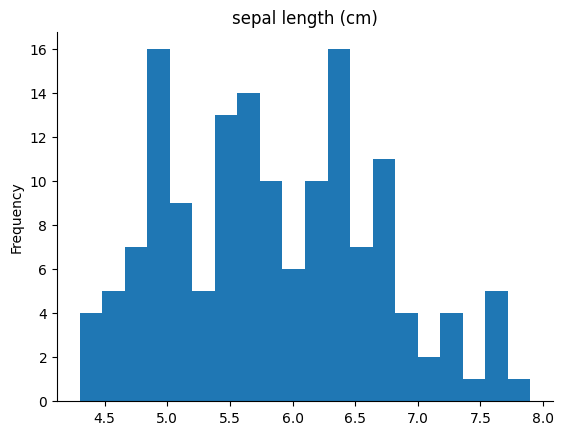

In [127]:
# @title sepal length (cm)

from matplotlib import pyplot as plt
df['sepal length (cm)'].plot(kind='hist', bins=20, title='sepal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**Plot pairwise plot to see relations between the features**

Hint : Use the seaborn library for pairplots

In [130]:
# Check the column names of the DataFrame
print("Column names of the Iris dataset:")
print(df.columns)


Column names of the Iris dataset:
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


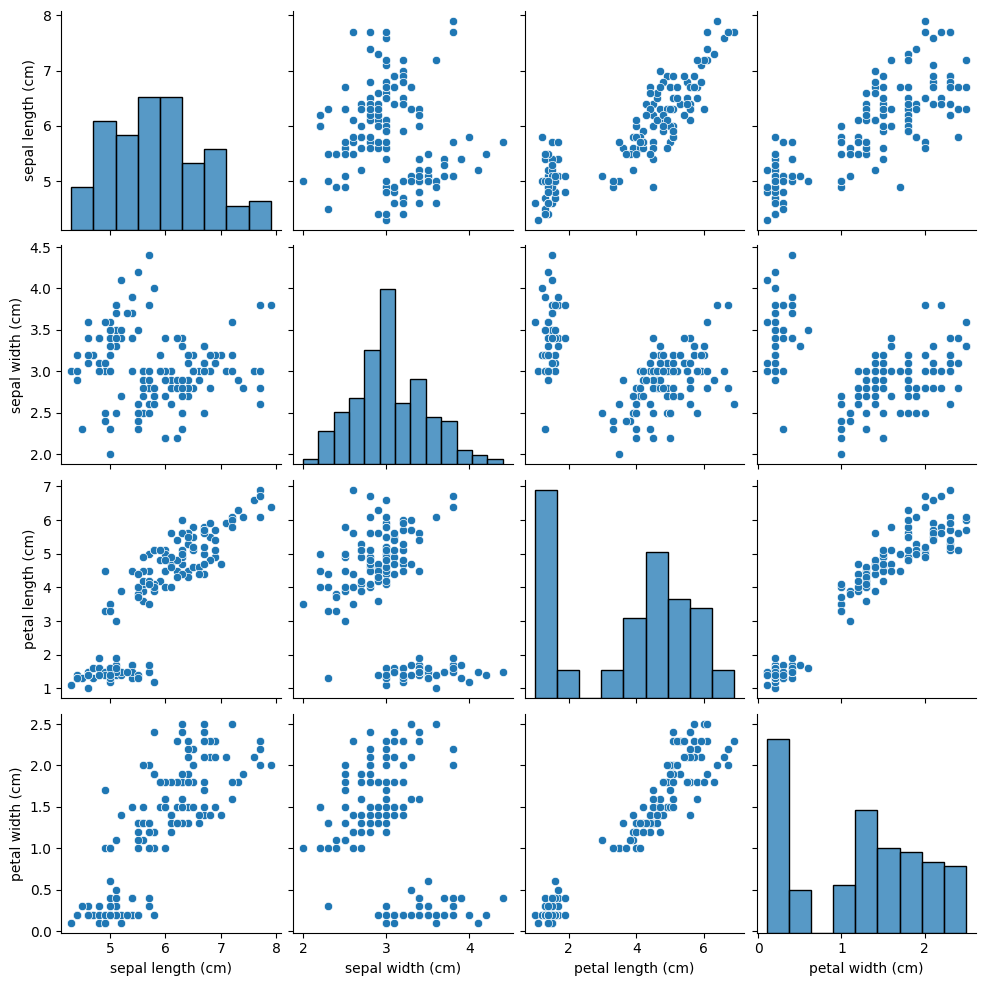

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pairwise relationships in the Iris dataset
sns.pairplot(df)
plt.show()


As apparent, there is no label assigned to these entries

**Therefore let us try to Cluster the data to see any similarities**

**Import KMeans from sklearn**

In [132]:
#ENTER YOUR CODE HERE
from sklearn.cluster import KMeans


**Perform K Means Clustering**

In [135]:
#ENTER YOUR CODE HERE

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(df)


cluster_labels = kmeans.labels_


print("Cluster labels:")
print(cluster_labels)

Cluster labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

**Add cluster labels to the DataFrame**

In [137]:
#ENTER YOUR CODE HERE
df['cluster'] = cluster_labels
print("Updated DataFrame with cluster labels:")
print(df.head())

Updated DataFrame with cluster labels:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


**Analyse the clusters, find the centers and the number of observations in each cluster**

In [139]:
#ENTER YOUR CODE HERE
cluster_centers = kmeans.cluster_centers_
cluster_counts = df['cluster'].value_counts()
print("Cluster centers:")
print(cluster_centers)
print("\nNumber of observations in each cluster:")
print(cluster_counts)


Cluster centers:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

Number of observations in each cluster:
cluster
0    62
1    50
2    38
Name: count, dtype: int64


**Visualise the cluster, make the plot again but this time with labels**

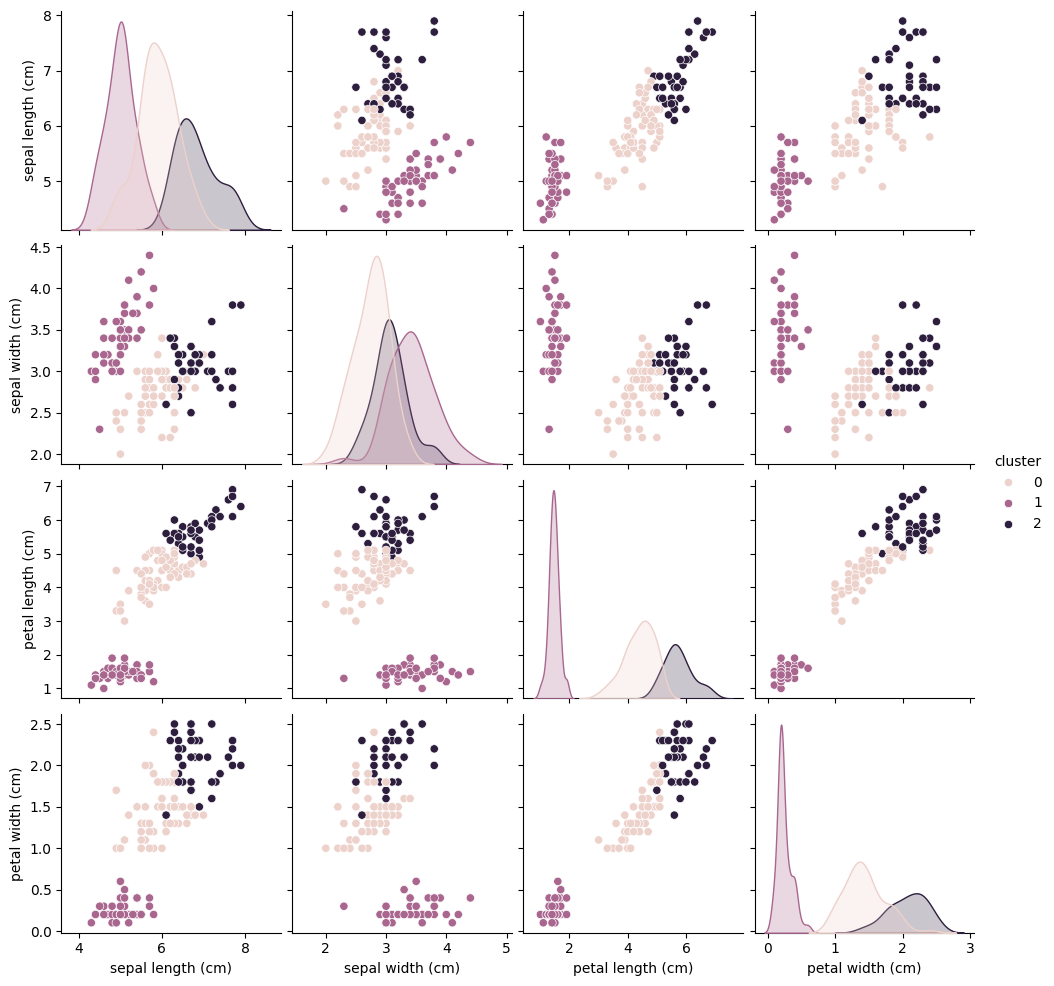

In [142]:
#ENTER YOUR CODE HERE
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='cluster')
plt.show()


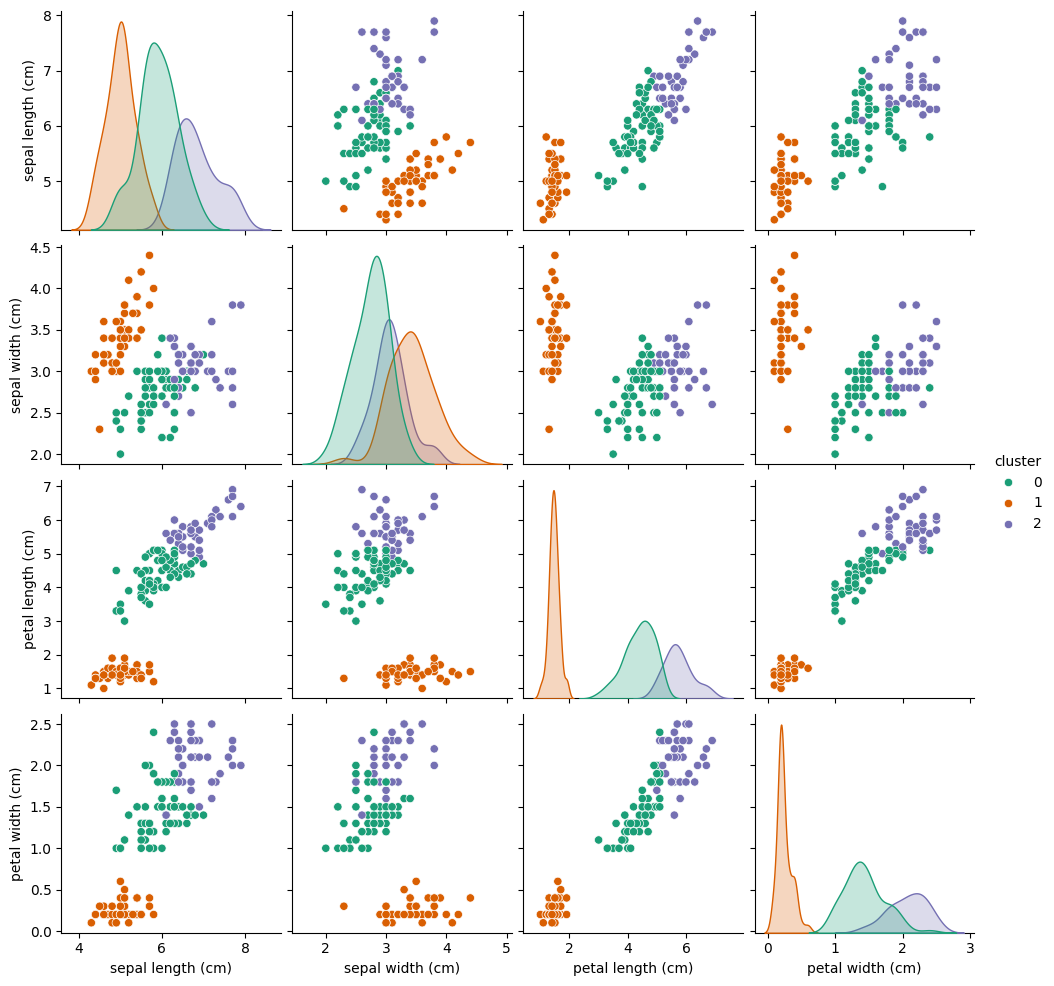

# GOOD JOB!